In [32]:
#### import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns


In [5]:
#### loading dataset
data = pd.read_csv('C:/Users/arifa/Downloads/Assignment/Assignment/5. Clustering - Capstone Project 3/5. Clustering/crime_data.csv')

In [6]:
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [7]:
##### renaming cloumn for unnamed.
data.rename(columns={'Unnamed: 0': 'City'}, inplace=True)

In [8]:
data.head()

,City,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [9]:
#### check the null values.
data.isnull().sum()

City        0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

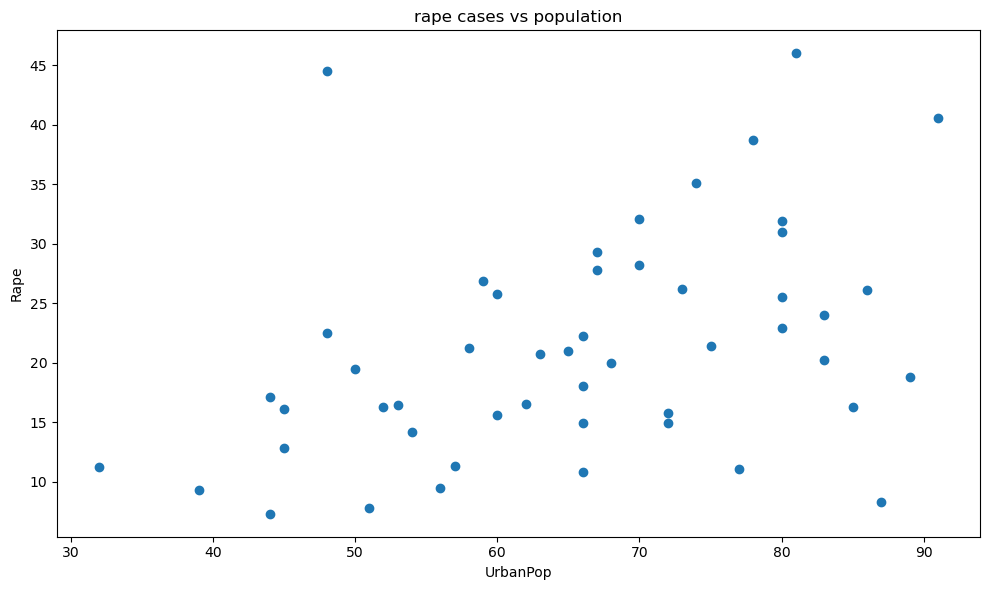

In [10]:
#### exploratory data analysis-EDA.
#### Insights- cases are increasing with increase in population
plt.figure(figsize=(10, 6))
plt.scatter(data['UrbanPop'],data['Rape'])
plt.title('rape cases vs population')
plt.xlabel('UrbanPop')
plt.ylabel('Rape')
plt.tight_layout()
plt.show()

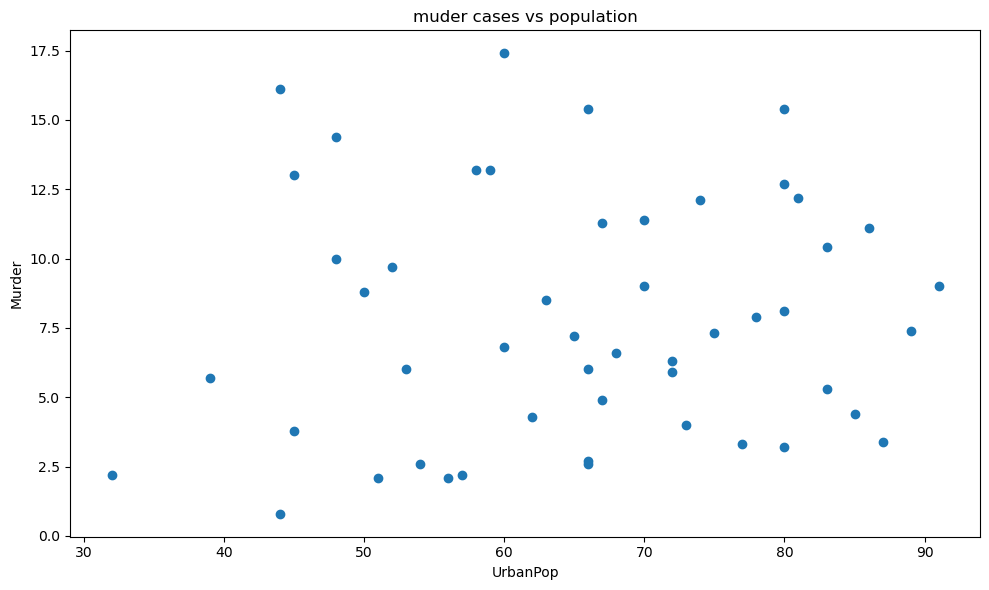

In [11]:
####  more cases in high population.
plt.figure(figsize=(10, 6))
plt.scatter(data['UrbanPop'],data['Murder'])
plt.title('muder cases vs population')
plt.xlabel('UrbanPop')
plt.ylabel('Murder')
plt.tight_layout()
plt.show()

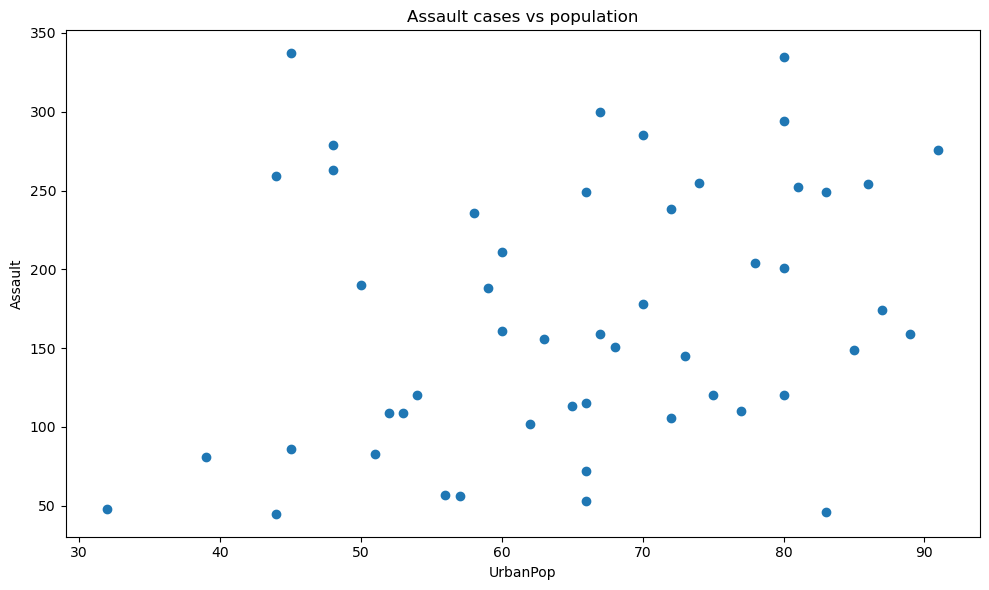

In [12]:
#### more cases in high population.
plt.figure(figsize=(10, 6))
plt.scatter(data['UrbanPop'],data['Assault'])
plt.title('Assault cases vs population')
plt.xlabel('UrbanPop')
plt.ylabel('Assault')
plt.tight_layout()
plt.show()

In [13]:
#### clustering only works on numerical data
x = data[['Murder', 'Assault', 'UrbanPop', 'Rape']]

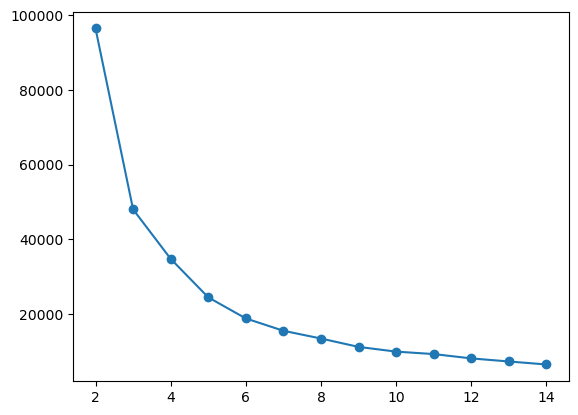

In [54]:
##### how to select the optimal clusters.
cluster_range = [2,3,4,5,6,7,8,9,10,11,12,13,14]
inertias = [] ###variances
for c in cluster_range:
    kmeans =  KMeans(n_clusters=c,random_state=0,).fit(x)
    inertias.append(kmeans.inertia_)
    
plt.figure()
plt.plot(cluster_range,inertias,marker = 'o')
plt.show()

In [55]:
#### data preprocessing scaling all the data in unique unit.
scaler = StandardScaler()
scaler.fit(x)
scaled_data = scaler.fit_transform(x)

In [56]:
scaled_data

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116,  1.5466429 ],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392, -0.41113292],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626, -0.41113292],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398,  1.5466429 ],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393, -0.41113292],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137, -0.41113292],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319,  0.56775499],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422,  0.56775499],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 , -0.41113292],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293,  1.5466429 ],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987,  0.56775499],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217, -1.39002083],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525, -0.41113292],
       [-0.13637203, -0.70012057, -0.0

In [57]:
#### we got optimum clusters as 4 from elbow method.
km = KMeans(n_clusters=4)
km.fit(scaled_data)
predicted_labels = km.predict(scaled_data)

In [58]:
predicted_labels

array([3, 2, 2, 3, 2, 2, 0, 0, 2, 3, 0, 1, 2, 0, 1, 0, 1, 3, 1, 2, 0, 2,
       1, 3, 2, 1, 0, 2, 1, 0, 2, 2, 3, 1, 0, 0, 0, 0, 0, 3, 1, 3, 2, 0,
       1, 0, 0, 1, 1, 0])

In [59]:
#### we are putting clusters in the dataframe.
x['clusters']= predicted_labels
x.head(5)

,Murder,Assault,UrbanPop,Rape,clusters
0,13.2,236,58,21.2,3
1,10.0,263,48,44.5,2
2,8.1,294,80,31.0,2
3,8.8,190,50,19.5,3
4,9.0,276,91,40.6,2


<AxesSubplot:xlabel='UrbanPop', ylabel='Murder'>

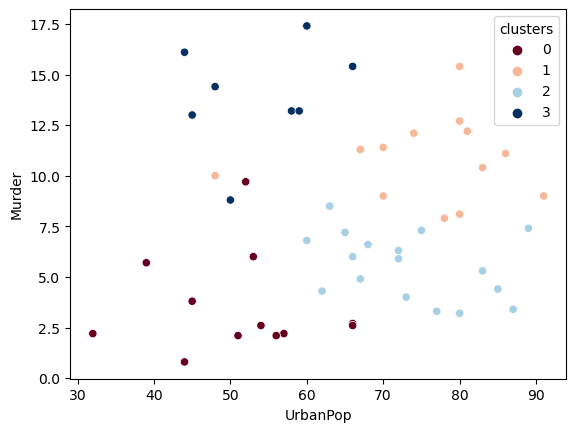

In [35]:
#### ploting  clusters using features to analyze.
sns.scatterplot(x = 'UrbanPop',y = 'Murder', hue = 'clusters',data=x,palette='RdBu')

<AxesSubplot:xlabel='UrbanPop', ylabel='Assault'>

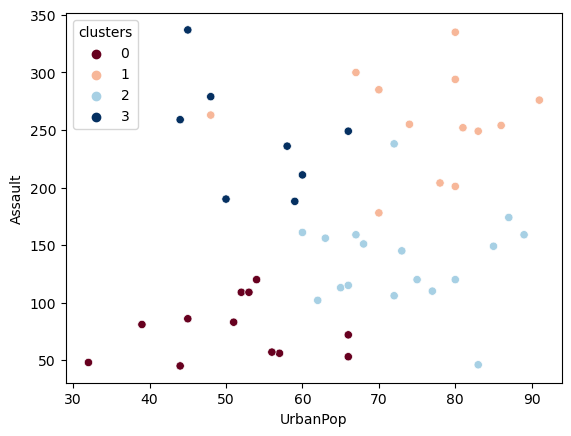

In [36]:
sns.scatterplot(x = 'UrbanPop',y = 'Assault', hue = 'clusters',data=x,palette='RdBu')

<AxesSubplot:xlabel='UrbanPop', ylabel='Rape'>

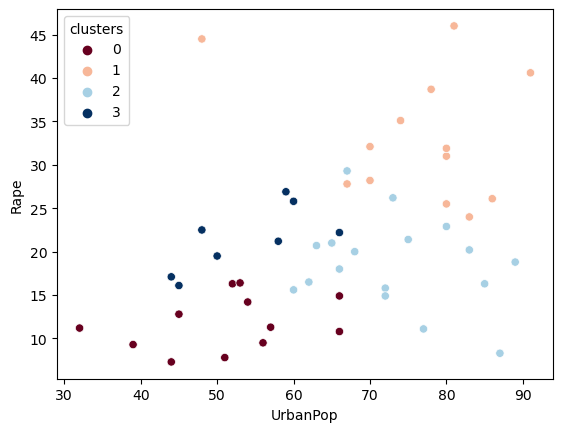

In [37]:
sns.scatterplot(x = 'UrbanPop',y = 'Rape', hue = 'clusters',data=x,palette='RdBu')

In [52]:
#### putting all numerical features in X. For Hierarchical clustering.
X=x[['Murder','Assault','UrbanPop','Rape']]
X.head(5)


,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [42]:
#### using AgglomerativeClustering  Hierarchical clustering.
from sklearn.cluster import AgglomerativeClustering 


In [43]:
#### as we got optimum clusters as 4 . using single linkage.
agm =AgglomerativeClustering(n_clusters = 4,linkage = 'single')
agm.fit(X)

AgglomerativeClustering(linkage='single', n_clusters=4)

In [44]:
pred_agm = agm.fit_predict(X)
pred_agm

array([0, 3, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

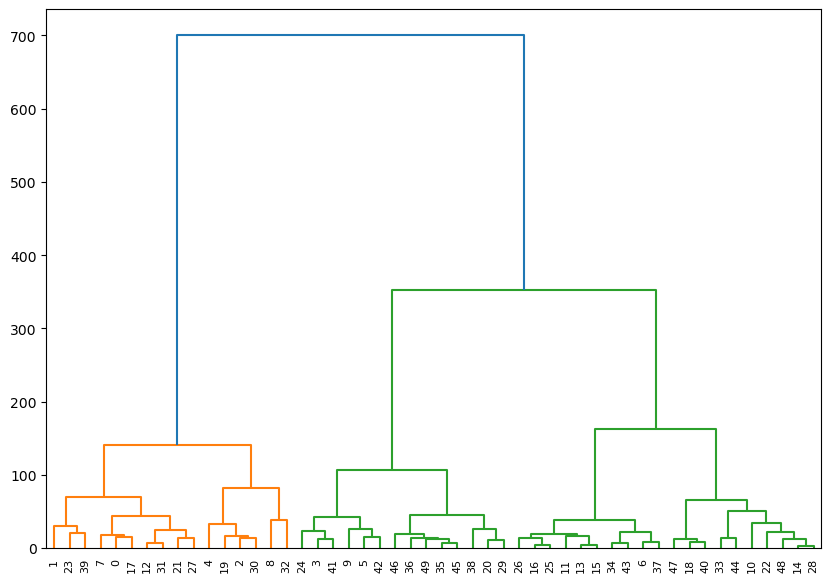

In [45]:
##### ploting dendogram to show the clustering process.
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10,7))
dend = sch.dendrogram(sch.linkage(X,method='ward'))

In [53]:
X['Cluster']=pred_agm
X.head(5)

,Murder,Assault,UrbanPop,Rape,Cluster
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,3
2,8.1,294,80,31.0,0
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,0


<AxesSubplot:xlabel='UrbanPop', ylabel='Rape'>

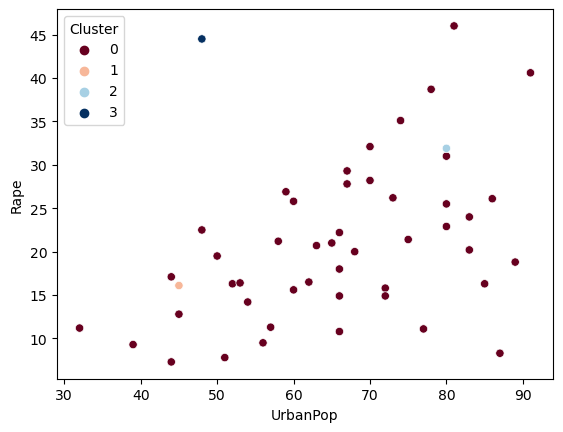

In [48]:
#### ploting to gain insights using scatterplot.
sns.scatterplot(x = 'UrbanPop',y = 'Rape', hue = 'Cluster',data=X,palette='RdBu')

<AxesSubplot:xlabel='UrbanPop', ylabel='Murder'>

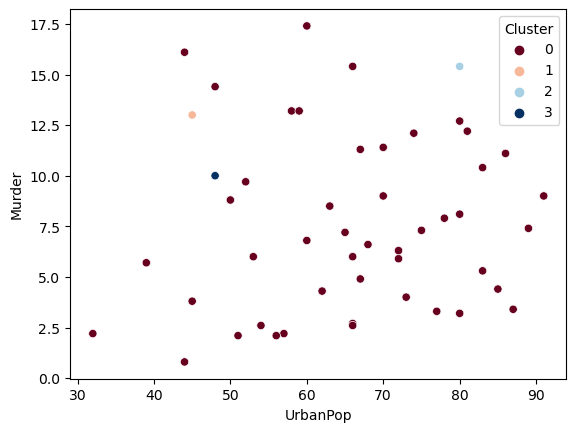

In [49]:
sns.scatterplot(x = 'UrbanPop',y = 'Murder', hue = 'Cluster',data=X,palette='RdBu')

<AxesSubplot:xlabel='UrbanPop', ylabel='Assault'>

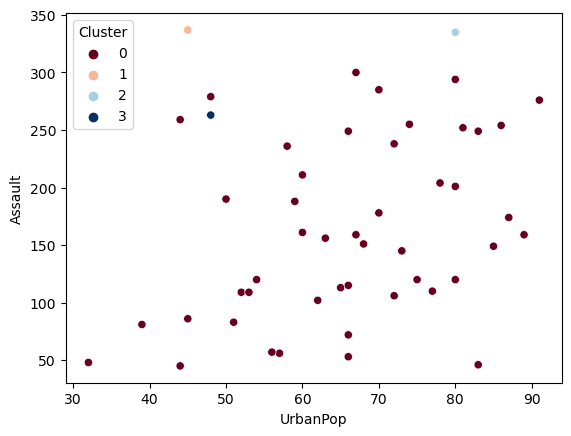

In [50]:
sns.scatterplot(x = 'UrbanPop',y = 'Assault', hue = 'Cluster',data=X,palette='RdBu')

In [ ]:
##### performed the Kmeans and Hierarchical clustering.
#### number of clusters are formed is "4" using elbow method.
#### From EDA gained the insughts that is "high crime rate is in more  population cities.
#### outcome from the both the models is "we have to focus on the more populated cities to decrease the crime_rate.